In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv("C:/PW/Semestr 4/ML/Projekt 1/data/learning_data.csv")

## **Wstępna analiza**

**INFO** \
This dataset contains prices of New York houses, providing valuable insights into the real estate market in the region. It includes information such as broker titles, house types, prices, number of bedrooms and bathrooms, property square footage, addresses, state, administrative and local areas, street names, and geographical coordinates.

In [37]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran West Side,Co-op for sale,415000,3,1.0,2184.207862,233 E 70th St Apt 6R,"New York, NY 10021","233 E 70th St Apt 6RNew York, NY 10021",New York,New York County,New York,Manhattan,233,"233 E 70th St #6r, New York, NY 10021, USA",40.767820,-73.959425
1,Brokered by Douglas Elliman - Roslyn,Multi-family home for sale,1699000,5,5.0,2184.207862,42-11 Astoria Blvd N,"Astoria, NY 11105","42-11 Astoria Blvd NAstoria, NY 11105",United States,New York,Queens County,Queens,Astoria Boulevard North,"42-11 Astoria Blvd N, Astoria, NY 11105, USA",40.769148,-73.907370
2,Brokered by EXP Realty,Condo for sale,675000,2,2.0,904.000000,92-29 Queens Blvd Unit 7H116,"Rego Park, NY 11374","92-29 Queens Blvd Unit 7H116Rego Park, NY 11374",United States,New York,Queens County,Queens,Queens Boulevard,"92-29 Queens Blvd, Rego Park, NY 11374, USA",40.732471,-73.867080
3,Brokered by Momentum Real Estate LLC,Multi-family home for sale,850000,3,2.0,1696.000000,213 Liberty Ave,"Staten Island, NY 10305","213 Liberty AveStaten Island, NY 10305",United States,New York,Richmond County,Staten Island,Liberty Avenue,"213 Liberty Ave, Staten Island, NY 10305, USA",40.587072,-74.094436
4,Brokered by COMPASS,Co-op for sale,825000,2,1.0,2184.207862,250 W 103rd St Apt 7D,"Manhattan, NY 10025","250 W 103rd St Apt 7DManhattan, NY 10025",New York,New York County,New York,Manhattan,250,"250 W 103rd St Apt 7b, New York, NY 10025, USA",40.799157,-73.969032


In [38]:
# rozmiar ramki
df.shape

(3360, 17)

In [39]:
# podział ramki 
X = df.drop(['PRICE'], axis=1)
y = df["PRICE"]

In [40]:
# podział na zbior do analizy i zbior testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [41]:
df_learning = X_train.join(y_train)

### Opis Kolumn
- BROKERTITLE: Title of the broker
- TYPE: Type of the house
- PRICE: Price of the house
- BEDS: Number of bedrooms
- BATH: Number of bathrooms
- PROPERTYSQFT: Square footage of the property
- ADDRESS: Full address of the house
- STATE: State of the house
- MAIN_ADDRESS: Main address information
- ADMINISTRATIVE_AREA_LEVEL_2: Administrative area level 2 information
- LOCALITY: Locality information
- SUBLOCALITY: Sublocality information
- STREET_NAME: Street name
- LONG_NAME: Long name
- FORMATTED_ADDRESS: Formatted address
- LATITUDE: Latitude coordinate of the house
- LONGITUDE: Longitude coordinate of the house

In [42]:
df_learning.info()
# brak wartosci null w kazdej kolumnie ramki danych

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 254 to 1829
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  2352 non-null   object 
 1   TYPE                         2352 non-null   object 
 2   BEDS                         2352 non-null   int64  
 3   BATH                         2352 non-null   float64
 4   PROPERTYSQFT                 2352 non-null   float64
 5   ADDRESS                      2352 non-null   object 
 6   STATE                        2352 non-null   object 
 7   MAIN_ADDRESS                 2352 non-null   object 
 8   ADMINISTRATIVE_AREA_LEVEL_2  2352 non-null   object 
 9   LOCALITY                     2352 non-null   object 
 10  SUBLOCALITY                  2352 non-null   object 
 11  STREET_NAME                  2352 non-null   object 
 12  LONG_NAME                    2352 non-null   object 
 13  FORMATTED_ADDRES

In [43]:
#usuwamy wiersze duplikujące się
df_learning.duplicated().sum()

44

In [44]:
df_learning.drop_duplicates(inplace=True)
df_learning.duplicated().sum()

0

In [45]:
df_learning.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE
count,2308.000000,2308.000000,2308.000000,2308.000000,2308.000000,2.308000e+03
mean,3.331023,2.360196,2151.071115,40.716284,-73.938993,2.936140e+06
std,2.688664,2.108176,2091.989668,0.086168,0.100486,4.501580e+07
min,1.000000,0.000000,260.000000,40.501789,-74.252823,2.494000e+03
25%,2.000000,1.000000,1192.250000,40.644988,-73.986992,4.990000e+05
50%,3.000000,2.000000,2184.207862,40.728820,-73.947950,8.075000e+05
75%,4.000000,3.000000,2184.207862,40.771404,-73.868892,1.496000e+06
max,50.000000,50.000000,48000.000000,40.912729,-73.703904,2.147484e+09


array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'LATITUDE'}>],
       [<AxesSubplot: title={'center': 'LONGITUDE'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

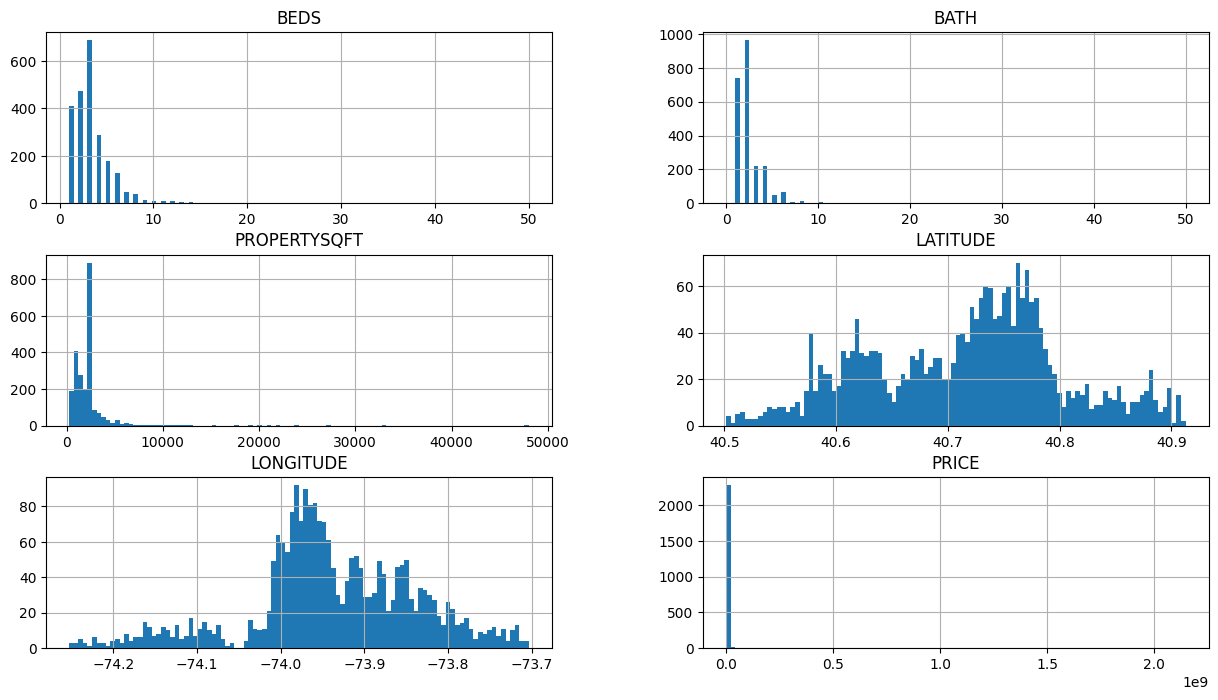

In [46]:
# rozkład zmiennych numerycznych 
df_learning.hist(bins=100, figsize=(15,8))

array([[<AxesSubplot: title={'center': 'BEDS'}>,
        <AxesSubplot: title={'center': 'BATH'}>],
       [<AxesSubplot: title={'center': 'PROPERTYSQFT'}>,
        <AxesSubplot: title={'center': 'PRICE'}>]], dtype=object)

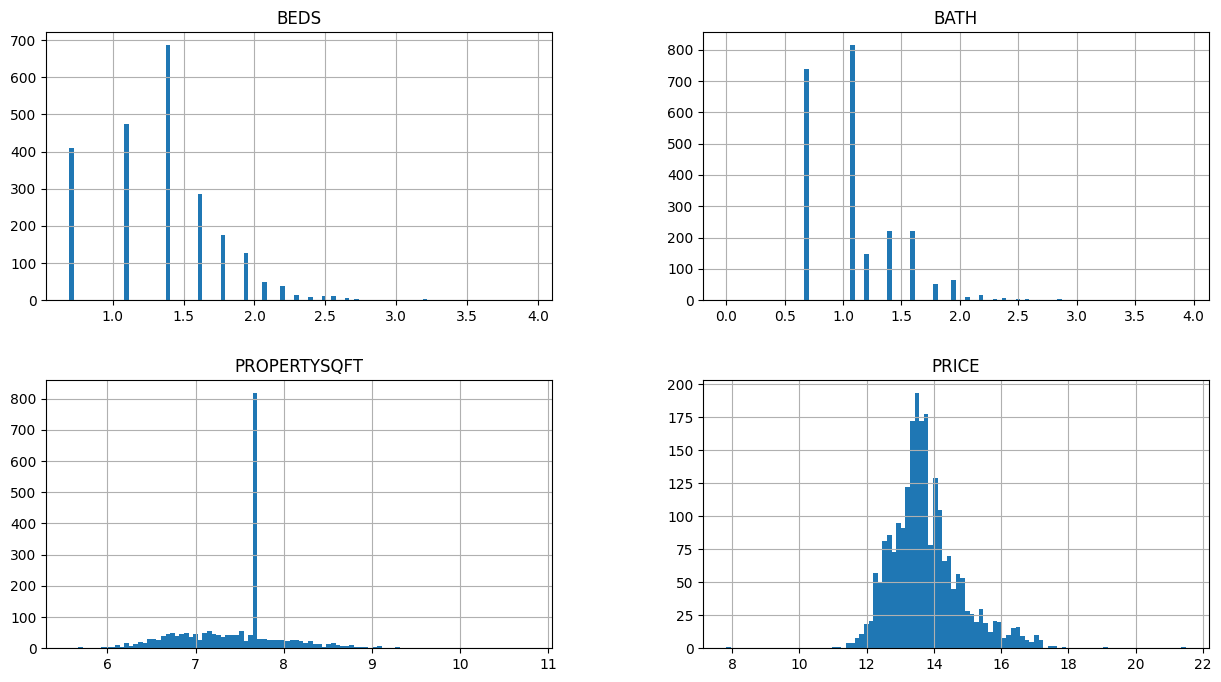

In [47]:
# sprawdzmy rozkłady najważniejszych dla nas zmiennych numerycznych, z przeskalowaniem logarytmicznym (naturalnym zwiększonym o 1)
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE"]]
np.log1p(df_num).hist(bins=100, figsize=(15,8))

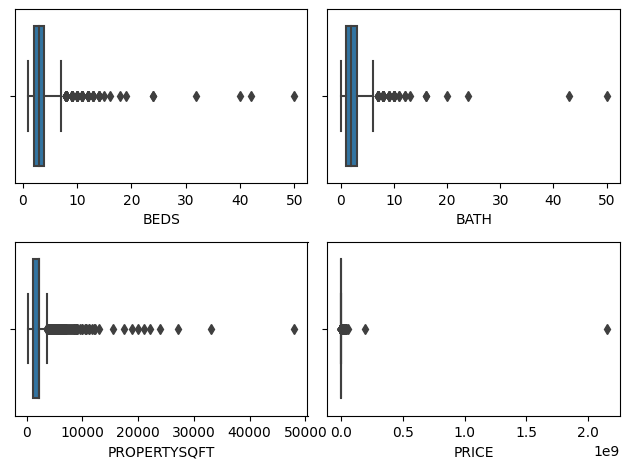

In [48]:
# analiza jako boxploty
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    #sns.boxplot(df_num, x= np.log1p(df_num[col]), ax= axes[i])
    sns.boxplot(df_num, x= df_num[col], ax= axes[i])
plt.tight_layout() 
plt.show()

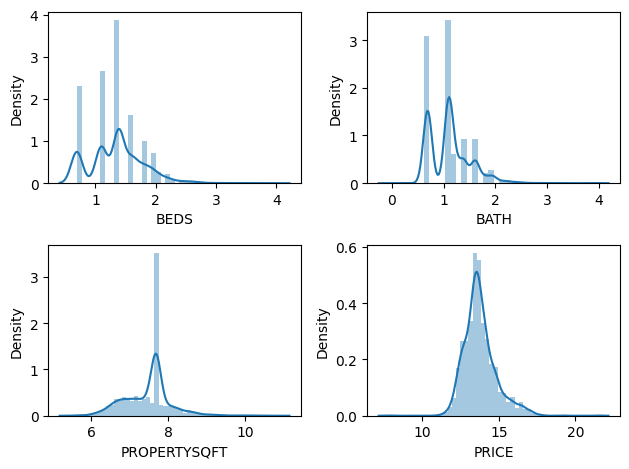

In [49]:
# jako gęstości
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.distplot(np.log1p(df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

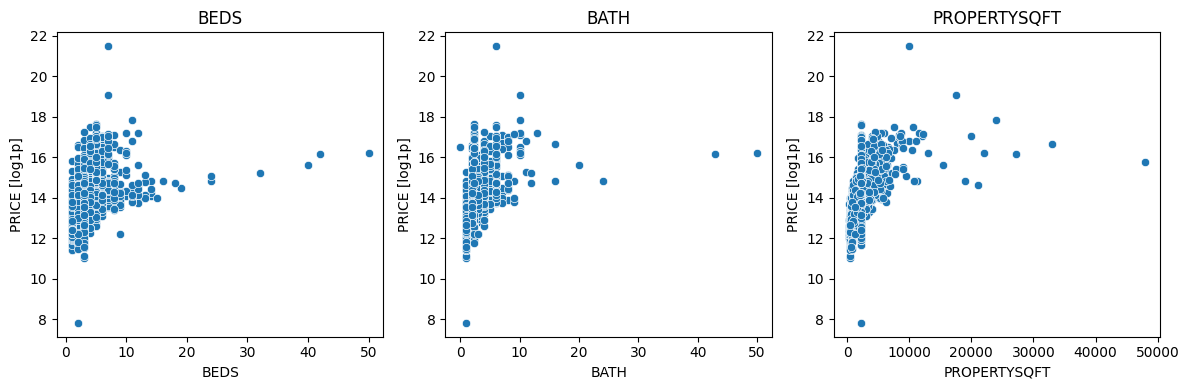

In [50]:
fig, axes = plt.subplots(1,3, figsize=(12, 4))
axes = axes.flatten()

for i, col in enumerate(df_num.columns[df_num.columns != "PRICE"]):
    sns.scatterplot(data=df_num, x= col, y= np.log1p(df_num["PRICE"]), ax= axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("PRICE [log1p]")

plt.tight_layout()
plt.show()

<AxesSubplot: >

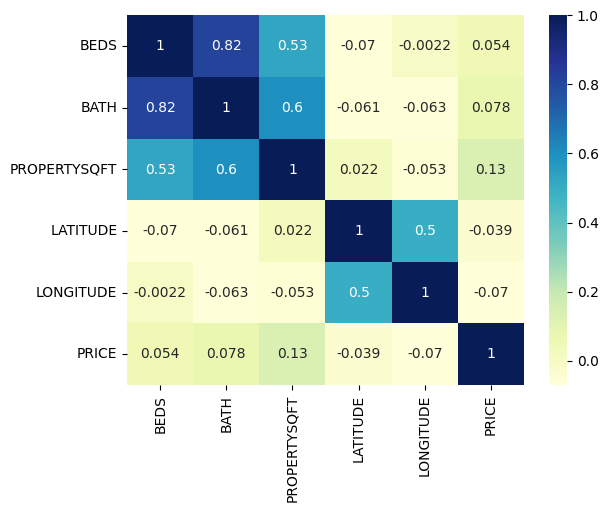

In [51]:
# korelacja danych numerycznych
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")

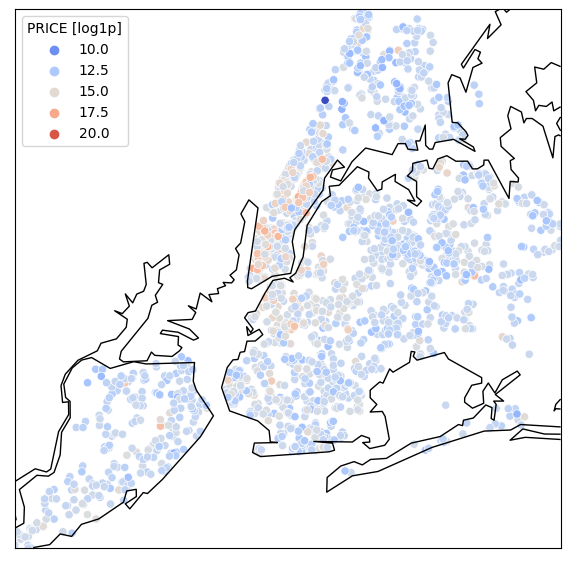

In [52]:
# TO mi nie działa idk co tam jest
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 7))
m = Basemap(projection='merc', llcrnrlat=min(df_learning.LATITUDE), urcrnrlat= max(df_learning.LATITUDE), llcrnrlon=min(df_learning.LONGITUDE), urcrnrlon=max(df_learning.LONGITUDE), resolution='h')

m.drawcoastlines()
m.drawcountries()
x, y = m(df_learning.LONGITUDE, df_learning.LATITUDE)

sns.scatterplot(x=x, y=y, hue= np.log1p(df_learning["PRICE"]), palette= "coolwarm")

plt.legend(title= "PRICE [log1p]")
plt.show()

In [53]:
cat_col = [col for col in df_learning.columns if df_learning[col].dtype == 'object']
df_learning[cat_col].nunique()
# widać ze kolumny Address, Main_Address, Long_Name i Formatted_Address mają bardzo dużo unikalnych obserwacji, co przy zmiennych kategorycznych
# moze nie działać najlepiej na model = pomijalne


BROKERTITLE                     716
TYPE                             11
ADDRESS                        2306
STATE                           269
MAIN_ADDRESS                   2307
ADMINISTRATIVE_AREA_LEVEL_2      20
LOCALITY                         10
SUBLOCALITY                      15
STREET_NAME                     140
LONG_NAME                      1663
FORMATTED_ADDRESS              2294
dtype: int64

In [54]:
df_learning = df_learning.drop(['ADDRESS', 'MAIN_ADDRESS', 'LONG_NAME', 'FORMATTED_ADDRESS'], axis = 1)

In [55]:
#sprawdzamy rozkład wartości w zmiennych kategorycznych
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    print(df_learning[col].value_counts())
    print(end= "\n________________________________________________________________\n")
    

Brokered by COMPASS                                219
Brokered by Douglas Elliman - 575 Madison Ave       59
Brokered by Brown Harris Stevens                    45
Brokered by Corcoran East Side                      45
Brokered by RE MAX Edge                             39
                                                  ... 
Brokered by Schmidt Realty Inc.                      1
Brokered by Henry Watts Real Estate Corporation      1
Brokered by Velez Realty Corp                        1
Brokered by GOLDEN REAL CORP.                        1
Brokered by NEXT - NextStopNY                        1
Name: BROKERTITLE, Length: 716, dtype: int64

________________________________________________________________
Co-op for sale                691
House for sale                494
Condo for sale                449
Multi-family home for sale    336
Townhouse for sale            142
Pending                       118
Contingent                     46
Land for sale                  19
Foreclosure 

In [56]:
# to samo, ale plus MEAN_PRICE dla kazdej kategorii
cols = ["BROKERTITLE", "TYPE", "STATE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]

for col in cols:
    df_tmp = df_learning[[col, "PRICE"]]
    df_tmp = pd.DataFrame(df_tmp.groupby(col)["PRICE"].mean()).reset_index()
    df_tmp.columns = [col, "MEAN_PRICE"]
    
    df_count = pd.DataFrame(df_learning[col].value_counts()).reset_index()
    df_count.columns = [col, "count"]
    
    df_median = df_learning[[col, "PRICE"]]
    df_median = pd.DataFrame(df_median.groupby(col)["PRICE"].median()).reset_index()
    df_median.columns = [col, "PRICE_MEDIAN"]
    
    df_std = df_learning[[col, "PRICE"]]
    df_std = pd.DataFrame(df_std.groupby(col)["PRICE"].std()).reset_index()
    df_std.columns = [col, "PRICE_STD"]
    
    df_max = df_learning[[col, "PRICE"]]
    df_max = pd.DataFrame(df_max.groupby(col)["PRICE"].max()).reset_index()
    df_max.columns = [col, "PRICE_MAX"]
    
    df_min = df_learning[[col, "PRICE"]]
    df_min = pd.DataFrame(df_min.groupby(col)["PRICE"].min()).reset_index()
    df_min.columns = [col, "PRICE_MIN"]
    
    df_q1 = df_learning[[col, "PRICE"]]
    df_q1 = pd.DataFrame(df_q1.groupby(col)["PRICE"].quantile(0.25)).reset_index()
    df_q1.columns = [col, "PRICE_Q1"]
    
    df_q2 = df_learning[[col, "PRICE"]]
    df_q2 = pd.DataFrame(df_q2.groupby(col)["PRICE"].quantile(0.75)).reset_index()
    df_q2.columns = [col, "PRICE_Q2"]
    
    
    df_tmp = pd.merge(df_count, df_tmp, on= col)
    df_tmp = pd.merge(df_tmp, df_median, on= col)
    df_tmp = pd.merge(df_tmp, df_std, on= col)
    df_tmp = pd.merge(df_tmp, df_max, on= col)
    df_tmp = pd.merge(df_tmp, df_min, on= col)
    df_tmp = pd.merge(df_tmp, df_q1, on= col)
    df_tmp = pd.merge(df_tmp, df_q2, on= col).sort_values("count", ascending=False).reset_index(drop= True)
    
    df_tmp = df_tmp.applymap(lambda x: '{:,.0f}'.format(x) if not isinstance(x, str) else x)
    
    print(df_tmp, end= "\n________________________________________________________________\n")   

                                       BROKERTITLE count MEAN_PRICE  \
0                              Brokered by COMPASS   219  2,562,408   
1    Brokered by Douglas Elliman - 575 Madison Ave    59  5,919,347   
2                 Brokered by Brown Harris Stevens    45  2,182,800   
3                   Brokered by Corcoran East Side    45  7,684,733   
4                          Brokered by RE MAX Edge    39    883,202   
..                                             ...   ...        ...   
711       Brokered by Parkchester Bronx Realty Inc     1    215,000   
712          Brokered by Dawning Real Estate, Inc.     1    699,000   
713            Brokered by Best American Homes Inc     1    989,000   
714               Brokered by Bizzarro Agency, LLC     1    105,000   
715                  Brokered by NEXT - NextStopNY     1    318,000   

    PRICE_MEDIAN  PRICE_STD   PRICE_MAX PRICE_MIN   PRICE_Q1    PRICE_Q2  
0      1,250,000  4,153,428  39,995,000    60,000    605,000   2,500,000

## **Eksperymentowanie z outlierami**

In [57]:
# usuńmy outliery z Price, gdzie rozkład jest zbliżony do normalnego (zasada 3 sigm)
print(f'Przed: { df_learning.shape[0]}')
df_learning['PRICE_LOG'] = np.log1p(df_learning['PRICE'])
mean_pr = df_learning['PRICE_LOG'].median()
std_pr = df_learning['PRICE_LOG'].std()
lower = mean_pr - 3 * std_pr
upper = mean_pr + 3 * std_pr
df_learning = df_learning[(df_learning['PRICE_LOG'] >= lower) & (df_learning['PRICE_LOG'] <= upper)]
print(f'Po: { df_learning.shape[0]}')

Przed: 2308
Po: 2275


In [58]:
#usuwamy outliery ze zmiennych BEDS i BATH
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BEDS'].quantile(0.95)
lower_lim = df_learning['BEDS'].quantile(0.05)
df_learning = df_learning[(df_learning['BEDS'] <= upper_lim) & (df_learning['BEDS'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2275
Wyjściowy rozmiar:  2181


In [59]:
print('Wejściowy rozmiar: ', df_learning.shape[0])

upper_lim = df_learning['BATH'].quantile(0.95)
lower_lim = df_learning['BATH'].quantile(0.05)
df_learning = df_learning[(df_learning['BATH'] <= upper_lim) & (df_learning['BATH'] >= lower_lim)]

print('Wyjściowy rozmiar: ', df_learning.shape[0])

Wejściowy rozmiar:  2181
Wyjściowy rozmiar:  2091


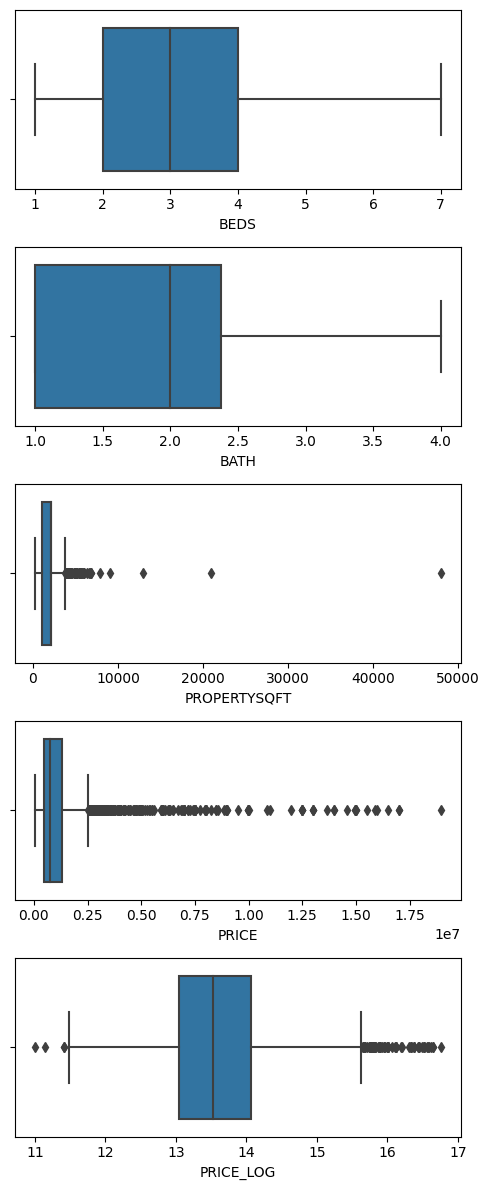

In [70]:
# Dane po usunięciu outlierów
df_num = df_learning[["BEDS", "BATH", "PROPERTYSQFT", "PRICE", "PRICE_LOG"]]

fig, axes = plt.subplots(5, 1, figsize= (5, 12))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(df_num, x= (df_num[col]), ax= axes[i])
    
plt.tight_layout() 
plt.show()

<AxesSubplot: >

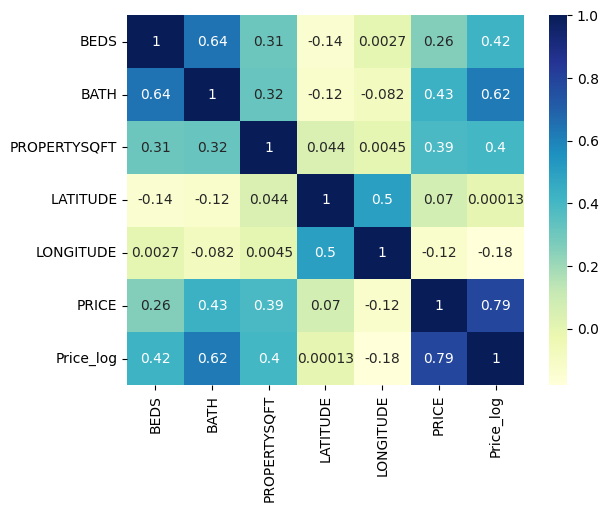

In [ ]:
sns.heatmap(df_learning.corr(), annot=True, cmap="YlGnBu")